## Implement the SIFT algorithm to detect and match key points between two images.

Saving c.jpeg to c.jpeg
Saving Car.webp to Car.webp


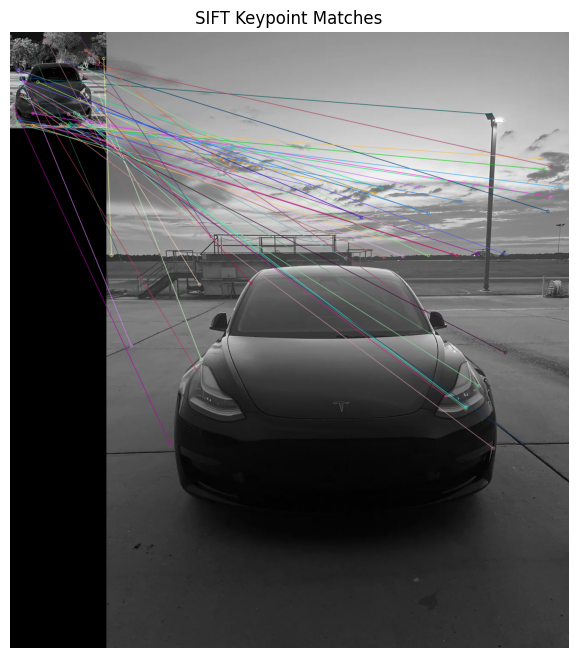

In [1]:
# Install OpenCV with contrib modules for SIFT
!pip install opencv-python opencv-contrib-python --quiet

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload two images
uploaded = files.upload()

# Automatically get filenames
img1 = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(list(uploaded.keys())[1], cv2.IMREAD_GRAYSCALE)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

# Display result
plt.figure(figsize=(15, 8))
plt.imshow(matched_img, cmap='gray')
plt.title('SIFT Keypoint Matches')
plt.axis('off')
plt.show()


Upload two images:


Saving c.jpeg to c (1).jpeg
Saving Car.webp to Car (1).webp
Image 1 - Keypoints


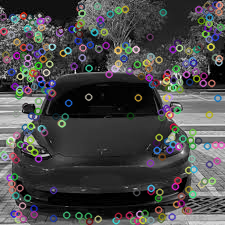

Image 2 - Keypoints


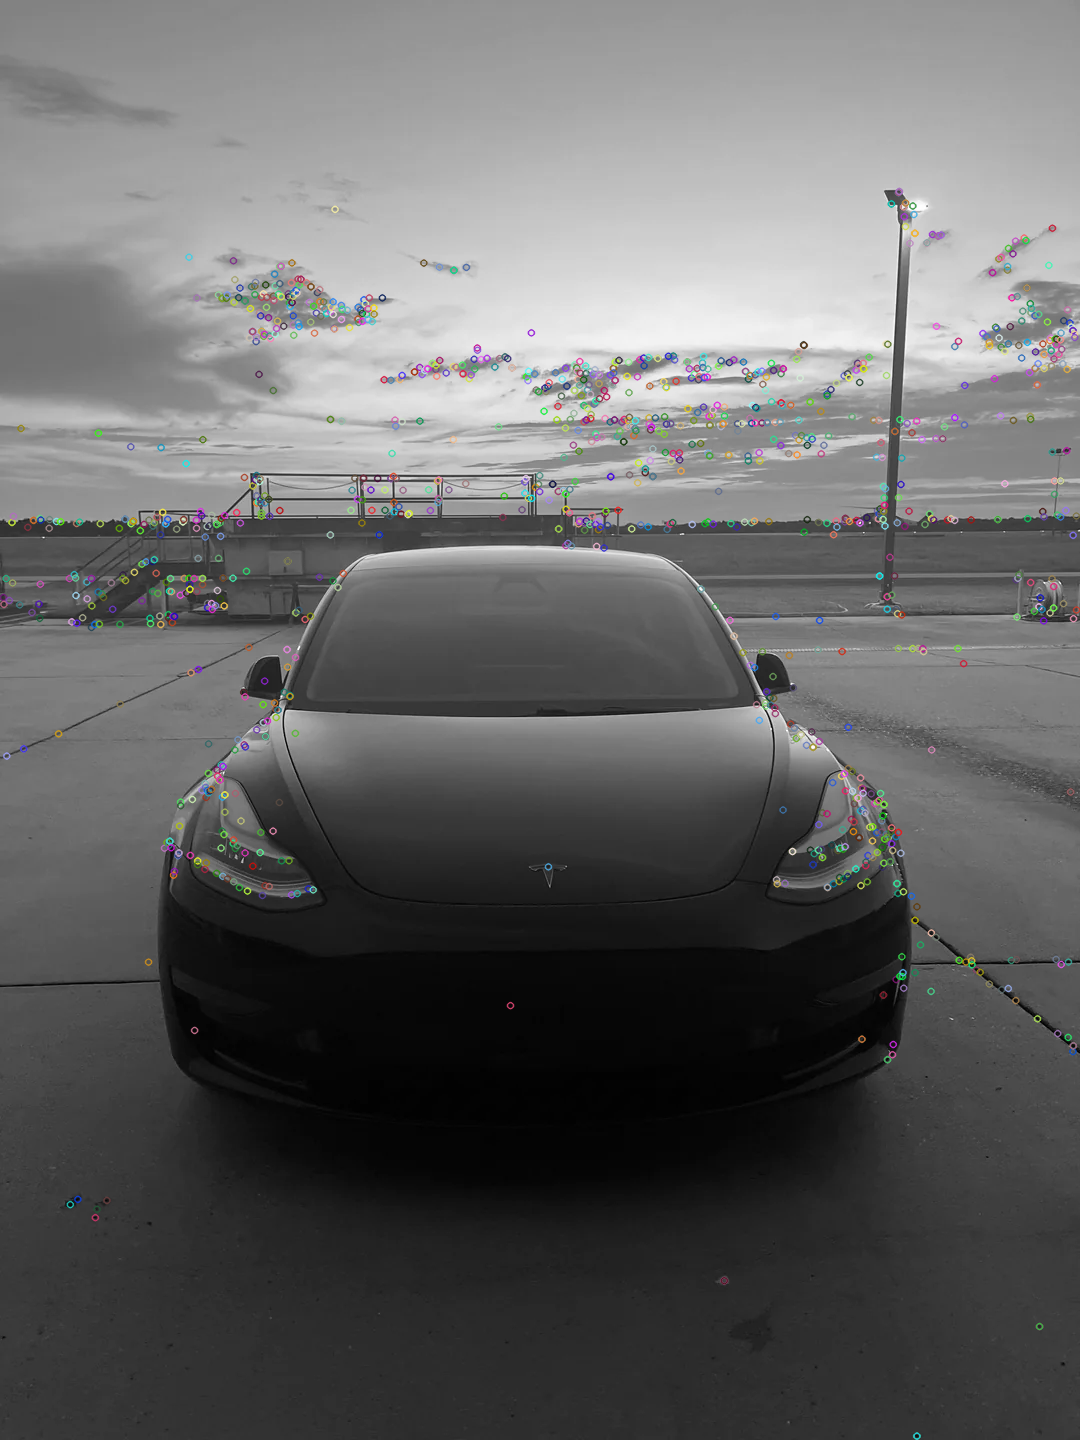

Matched Keypoints between Image 1 and Image 2


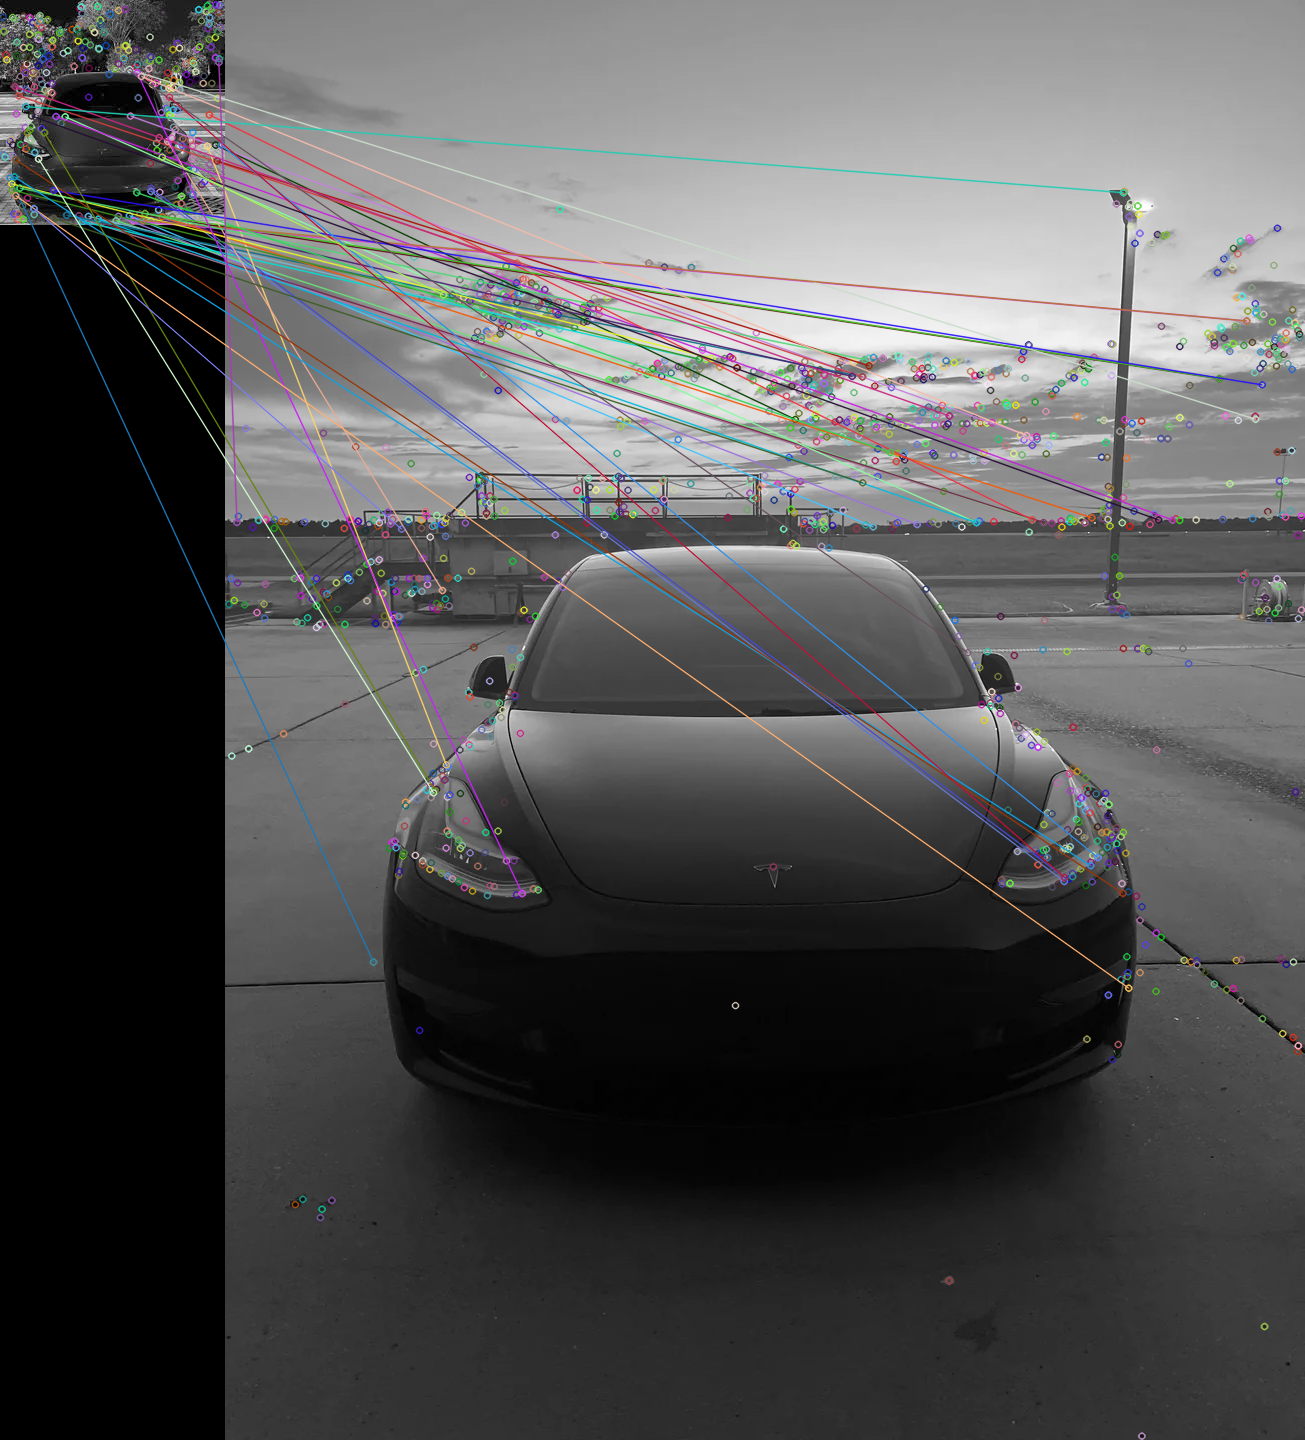

In [2]:
# Install OpenCV contrib (for SIFT)
!pip install opencv-contrib-python --quiet

# Import required libraries
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload two images
print("Upload two images:")
uploaded = files.upload()
img_names = list(uploaded.keys())

# Read both images in grayscale
img1 = cv2.imread(img_names[0], 0)
img2 = cv2.imread(img_names[1], 0)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Draw keypoints on both images
img1_kp = cv2.drawKeypoints(img1, kp1, None)
img2_kp = cv2.drawKeypoints(img2, kp2, None)

# Display keypoints on both images
print("Image 1 - Keypoints")
cv2_imshow(img1_kp)

print("Image 2 - Keypoints")
cv2_imshow(img2_kp)

# Match descriptors using Brute-Force matcher
bf = cv2.BFMatcher()
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)

# Display matched keypoints
print("Matched Keypoints between Image 1 and Image 2")
cv2_imshow(matched_img)
